In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
pd.set_option('display.max_rows', 99)
pd.set_option('display.max_columns', 99)

In [2]:
df = pd.read_csv('ds_practical.txt', sep = '|')

In [3]:
df.head()

,anon_person_id,target,state,presence_of_child_ind,streaming_media_subs,streaming_entertainment_subs,marital_status,gender,income,number_of_news_subs,age
0,1,0,CA,0,N,0,M,Female,$175k-199k,0,43.0
1,2,0,CA,0,N,0,U,Male,$225k-249k,0,90.0
2,3,1,CA,0,Y,1,S,Female,$150k-174k,0,46.0
3,4,0,CA,1,N,0,U,Female,$125k-149k,0,25.0
4,5,0,CA,0,N,0,U,Female,$175k-199k,0,62.0


In [4]:
df.shape

(1000000, 11)

# Data Cleaning

In [5]:
df.isna().sum()

anon_person_id                      0
target                              0
state                           10024
presence_of_child_ind               0
streaming_media_subs                0
streaming_entertainment_subs        0
marital_status                      0
gender                              0
income                              0
number_of_news_subs                 0
age                             19702
dtype: int64

In [6]:
df['state'] = df['state'].fillna('CA') # fill in missing value with majority class
df['age'] = df['age'].fillna(df.age.mean()) # fill in missing value with mean age
df['gender'].replace(['feMalee'],['Female'],inplace=True) # Replace the wrong category name

In [7]:
# find if there is any duplication
df[df.duplicated()]

,anon_person_id,target,state,presence_of_child_ind,streaming_media_subs,streaming_entertainment_subs,marital_status,gender,income,number_of_news_subs,age
999500,1,0,CA,0,N,0,M,Female,$175k-199k,0,43.000000
999501,2,0,CA,0,N,0,U,Male,$225k-249k,0,90.000000
999502,3,1,CA,0,Y,1,S,Female,$150k-174k,0,46.000000
999503,4,0,CA,1,N,0,U,Female,$125k-149k,0,25.000000
999504,5,0,CA,0,N,0,U,Female,$175k-199k,0,62.000000
...,...,...,...,...,...,...,...,...,...,...,...
999995,496,0,CA,0,N,0,M,Female,$175k-199k,0,46.851937
999996,497,0,CA,1,N,0,U,Female,$125k-149k,0,46.851937
999997,498,1,CA,1,Y,1,S,Female,$100k-124k,1,46.851937
999998,499,0,CA,0,N,0,U,Female,$225k-249k,0,46.851937


In [8]:
# drop duplicates
df = df.drop_duplicates()

# EDA

In [9]:
# state

<AxesSubplot:xlabel='state'>

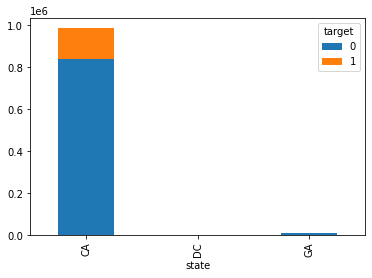

In [10]:
pd.crosstab(df['state'], df['target']).plot(kind='bar', stacked=True)

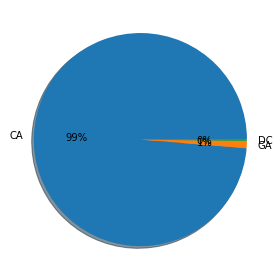

In [11]:
labels = ['CA', 'GA', 'DC']
y = np.array(df['state'].value_counts())
plt.pie(y,labels=labels,shadow = True, autopct='%1.0f%%')
plt.tight_layout()

In [12]:
for x in df['state'].unique():
    print (x)
    ratio = round(df[df['state']==x].target.sum()/len(df[df['state']==x]), 2) 
    print(ratio)

CA
0.15
GA
0.08
DC
0.03


<div class="alert alert-block alert-info">
Most of the sample users are from CA, and CA also has the highest percentage of target users which is 15%, follow by GA 8% and DC 3%.
</div>

In [13]:
# presence_of_child_ind

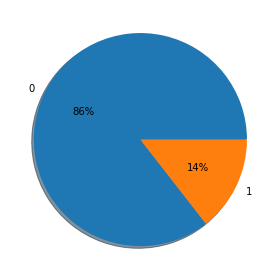

In [14]:
labels = ['0', '1']
y = np.array(df['presence_of_child_ind'].value_counts())
plt.pie(y,labels=labels,shadow = True, autopct='%1.0f%%')
plt.tight_layout()

<AxesSubplot:xlabel='presence_of_child_ind'>

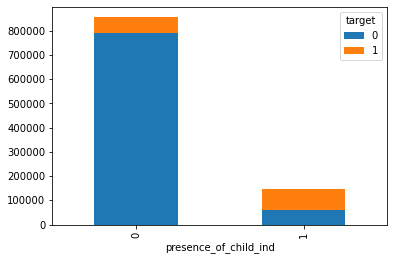

In [15]:
pd.crosstab(df['presence_of_child_ind'], df['target']).plot(kind='bar', stacked=True)

In [16]:
for x in df['presence_of_child_ind'].unique():
    print (x)
    ratio = round(df[df['presence_of_child_ind']==x].target.sum()/len(df[df['presence_of_child_ind']==x]), 2) 
    print(ratio)

0
0.08
1
0.59


<div class="alert alert-block alert-info">
86% of the sample users don't have child at home. Among those who have no child only 8% are target users, while among those who have child 59% are target users.
</div>

In [17]:
# streaming_media_subs

<AxesSubplot:xlabel='streaming_media_subs'>

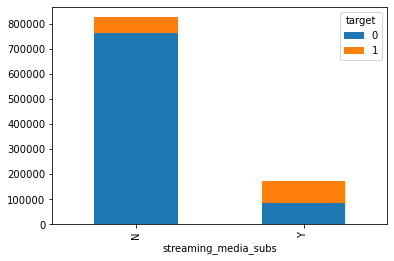

In [18]:
pd.crosstab(df['streaming_media_subs'], df['target']).plot(kind='bar', stacked=True)

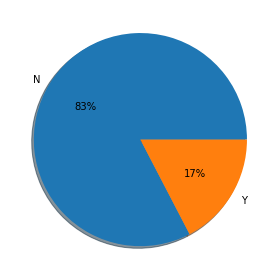

In [19]:
labels = ['N', 'Y']
y = np.array(df['streaming_media_subs'].value_counts())
plt.pie(y,labels=labels,shadow = True, autopct='%1.0f%%')
plt.tight_layout()

In [20]:
for x in df['streaming_media_subs'].unique():
    print (x)
    ratio = round(df[df['streaming_media_subs']==x].target.sum()/len(df[df['streaming_media_subs']==x]), 2) 
    print(ratio)

N
0.07
Y
0.51


<div class="alert alert-block alert-info">
17% of the sample users have streaming_media_subs. Among those who have streaming_media_subs 51% are target users.
</div>

In [21]:
# streaming_entertainment_subs

<AxesSubplot:xlabel='streaming_entertainment_subs'>

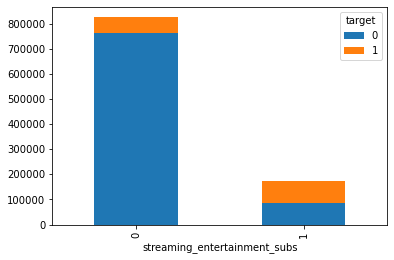

In [22]:
pd.crosstab(df['streaming_entertainment_subs'], df['target']).plot(kind='bar', stacked=True)

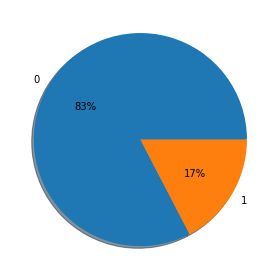

In [23]:
labels = ['0', '1']
y = np.array(df['streaming_entertainment_subs'].value_counts())
plt.pie(y,labels=labels,shadow = True, autopct='%1.0f%%')
plt.tight_layout()

In [24]:
for x in df['streaming_entertainment_subs'].unique():
    print (x)
    ratio = round(df[df['streaming_entertainment_subs']==x].target.sum()/len(df[df['streaming_entertainment_subs']==x]), 2) 
    print(ratio)

0
0.07
1
0.51


<div class="alert alert-block alert-info">
17% of the sample users have streaming_entertainment_subs. Among those who have streaming_entertainment_subs 51% are target users.
</div>

In [25]:
# marital_status

<AxesSubplot:xlabel='marital_status'>

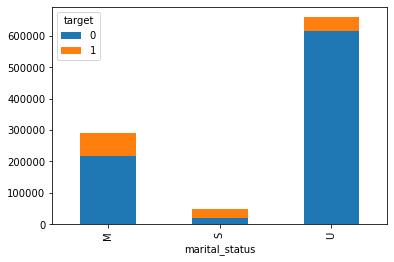

In [26]:
pd.crosstab(df['marital_status'], df['target']).plot(kind='bar', stacked=True)

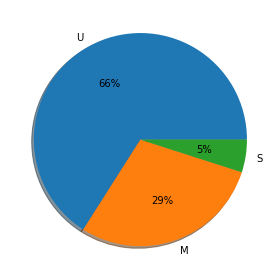

In [27]:
labels = ['U', 'M','S']
y = np.array(df['marital_status'].value_counts())
plt.pie(y,labels=labels,shadow = True, autopct='%1.0f%%')
plt.tight_layout()

In [28]:
for x in df['marital_status'].unique():
    print (x)
    ratio = round(df[df['marital_status']==x].target.sum()/len(df[df['marital_status']==x]), 2) 
    print(ratio)

M
0.25
U
0.07
S
0.61


<div class="alert alert-block alert-info">
66% of the sample users have unknown marital_status. Among those who are single, 61% are target users.
</div>

In [29]:
# gender

<AxesSubplot:xlabel='gender'>

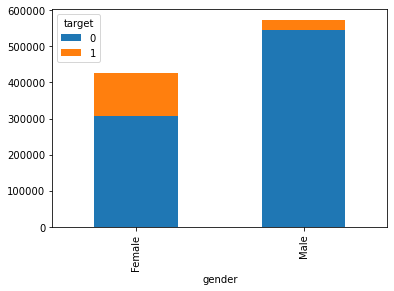

In [30]:
pd.crosstab(df['gender'], df['target']).plot(kind='bar', stacked=True)

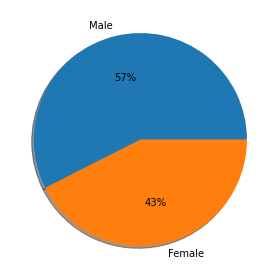

In [31]:
labels = ['Male', 'Female']
y = np.array(df['gender'].value_counts())
plt.pie(y,labels=labels,shadow = True, autopct='%1.0f%%')
plt.tight_layout()

In [32]:
for x in df['gender'].unique():
    print (x)
    ratio = round(df[df['gender']==x].target.sum()/len(df[df['gender']==x]), 2) 
    print(ratio)

Female
0.28
Male
0.05


<div class="alert alert-block alert-info">
57% of the sample users are Male. Among those who are female, 28% are target users.
</div>

In [33]:
# income

<AxesSubplot:xlabel='income'>

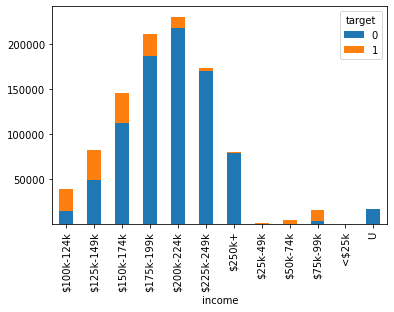

In [34]:
pd.crosstab(df['income'], df['target']).plot(kind='bar', stacked=True)

In [35]:
for x in df['income'].unique():
    print (x)
    ratio = round(df[df['income']==x].target.sum()/len(df[df['income']==x]), 2) 
    print(ratio)

$175k-199k
0.11
$225k-249k
0.02
$150k-174k
0.23
$125k-149k
0.41
$100k-124k
0.62
$200k-224k
0.05
$250k+
0.01
U
0.0
$75k-99k
0.8
$50k-74k
0.9
$25k-49k
0.96
<$25k
0.97


<div class="alert alert-block alert-info">
Some income groups have similar target%, which can be an indicator to combine some of the income categories together. Doing so could help with feature reduction as well.
</div>

In [36]:
# number_of_news_subs

<AxesSubplot:xlabel='number_of_news_subs'>

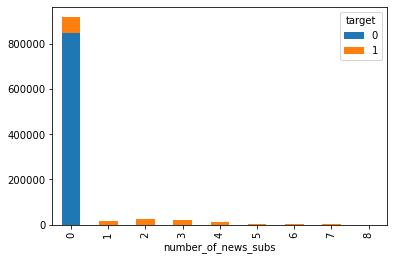

In [37]:
pd.crosstab(df['number_of_news_subs'], df['target']).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='number_of_news_subs', ylabel='Density'>

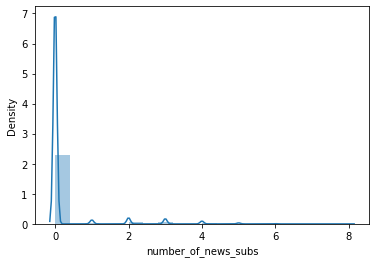

In [38]:
sns.distplot(df.number_of_news_subs, 20)

In [39]:
for x in df['number_of_news_subs'].unique():
    print (x)
    ratio = round(df[df['number_of_news_subs']==x].target.sum()/len(df[df['number_of_news_subs']==x]), 2) 
    print(ratio)

0
0.08
3
1.0
1
1.0
5
1.0
2
1.0
6
1.0
4
1.0
7
1.0
8
1.0


<div class="alert alert-block alert-info">
Judging by the ratio distribution, all audience with larger than 0 news subs are target, which can be an indicator to combine category level 1-8 together. 
</div>

In [40]:
# age

<AxesSubplot:xlabel='age', ylabel='Density'>

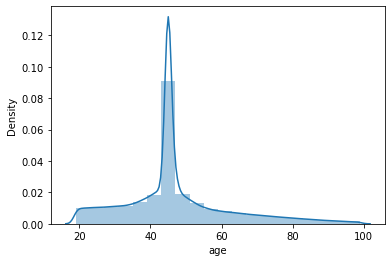

In [41]:
sns.distplot(df.age, 20)

<AxesSubplot:xlabel='age'>

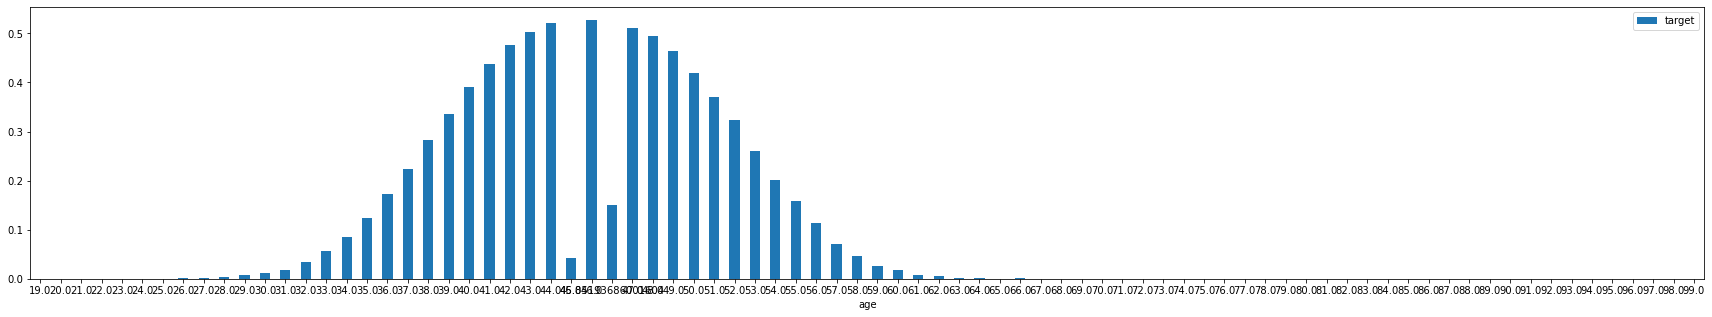

In [42]:
age_target = pd.DataFrame(df.groupby('age').target.sum()/df.groupby('age').target.count()).reset_index()
#age_target.sort_values(by=['age'], ascending=True)
fig, ax = plt.subplots(figsize=(30, 5))
age_target.plot.bar(x='age', y='target', rot=0,ax=ax)

<div class="alert alert-block alert-info">
From the ratio distribution among different ages, variable 'age' can be binned to roughly 4 categories: 19-29, 30-44, 45-60, 61-99  
</div>

# Feature Engineering

In [43]:
df['income'].replace(['<$25k','$25k-49k', '$50k-74k','$75k-99k'],['0_To_99k','0_To_99k','0_To_99k','0_To_99k'],inplace=True)
df['income'].replace(['$225k-249k','$200k-224k', '$250k+'],['More_Than_200k','More_Than_200k','More_Than_200k'],inplace=True)
df['income'].replace(['$100k-124k','$125k-149k'],['100k_To_149k','100k_To_149k'],inplace=True)
df['income'].replace(['$150k-174k','$175k-199k'],['150k_To_199k','150k_To_199k'],inplace=True)

In [44]:
for x in df['number_of_news_subs'].unique():
    if x!=0:
        df['number_of_news_subs'].replace([x],['More_Than_0'],inplace=True)

In [45]:
df['age_bin'] = '999'
df.loc[df['age'] <30, 'age_bin'] = '19_To_29'
df.loc[df['age'] >60, 'age_bin'] = '61_To_99'
df.loc[(df['age'] >= 30) & (df['age'] <= 44), 'age_bin'] = '30_To_44'
df.loc[(df['age'] >= 45) & (df['age'] <= 60), 'age_bin'] = '45_To_60'
#df['age_bin'].unique()
del df['age']

# Feature Selection

In [46]:
df[df.target == 1].shape[0]/df.shape[0] #15/85

0.1497408704352176

<div class="alert alert-block alert-info">
In this sample size 'target' is 15% of the entire population, therefore I will be using 15/85 as the class_weight going forward.
</div>

In [47]:
person_id = df.anon_person_id
y = df.target
X = df.loc[:, df.columns != 'target']
del X['anon_person_id']
X = X.astype('category')
X_encoded = pd.get_dummies(X) # one hot encoding

<div class="alert alert-block alert-info">
Following I will use Boruta as my feature selection method. 
</div>

Boruta method is based on two idea:
- In Boruta, features do not compete among themselves. They compete with a randomized version of them.
- The threshold is defined as the highest feature importance recorded among the shadow features. A feature is useful only if it’s capable of doing better than the best randomized feature.

In [48]:
# Boruta

In [49]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [50]:
### initialize Boruta
forest = RandomForestClassifier(
    n_jobs = -1, 
    max_depth = 5,
    n_estimators=100,
    criterion='entropy',
    class_weight={1:0.15,0:0.85},
    random_state=42)

boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)

### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X_encoded), np.array(y))
    
### print results
selected_features = X_encoded.columns[boruta.support_].to_list()
tbd_features = X_encoded.columns[boruta.support_weak_].to_list()
print('features selected:', selected_features)
print('features in consideration:', tbd_features)

features selected: ['state_CA', 'state_DC', 'state_GA', 'presence_of_child_ind_0', 'presence_of_child_ind_1', 'streaming_media_subs_N', 'streaming_media_subs_Y', 'streaming_entertainment_subs_0', 'streaming_entertainment_subs_1', 'marital_status_M', 'marital_status_S', 'marital_status_U', 'gender_Female', 'gender_Male', 'income_0_To_99k', 'income_100k_To_149k', 'income_150k_To_199k', 'income_More_Than_200k', 'income_U', 'number_of_news_subs_0', 'number_of_news_subs_More_Than_0', 'age_bin_19_To_29', 'age_bin_30_To_44', 'age_bin_45_To_60', 'age_bin_61_To_99']
features in consideration: []


In [51]:
set(X_encoded.columns) - set(selected_features) 

set()

<div class="alert alert-block alert-info">
I will keep all features as they are all selected.
</div>

# XGBOOST

In [52]:
# conda install -c anaconda py-xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)

<div class="alert alert-block alert-info">
Build preliminary XGB
</div>

In [54]:
# define a timer to keep track on training time
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now()-start_time).total_seconds(), 3600)
        tmin,tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec,2)))

In [55]:
# defining a generic Function to give ROC_AUC Scores in table format for better readability
from sklearn.model_selection import cross_val_score
def crossvalscore(model):
    scores = cross_val_score(model,X_encoded,y,cv=5,scoring='roc_auc',n_jobs=-1) 
    acc = cross_val_score(model,X_encoded,y,cv=5,scoring='accuracy',n_jobs=-1)
    rand_scores = pd.DataFrame({
    'cv':range(1,6),
    'roc_auc score':scores,
    'accuracy score':acc
    })
    print('AUC :',rand_scores['roc_auc score'].mean())
    print('accuracy :',rand_scores['accuracy score'].mean())
    return rand_scores.sort_values(by='roc_auc score',ascending=False)

In [56]:
### initialize XGB
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                            missing=None, 
                            seed=42,
                            eval_metric='aucpr')

In [57]:
### fit XGB
clf_xgb.fit(X_train,
            y_train,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.89609
[1]	validation_0-aucpr:0.90140
[2]	validation_0-aucpr:0.90615
[3]	validation_0-aucpr:0.90792
[4]	validation_0-aucpr:0.91027
[5]	validation_0-aucpr:0.91181
[6]	validation_0-aucpr:0.91260
[7]	validation_0-aucpr:0.91322
[8]	validation_0-aucpr:0.91383
[9]	validation_0-aucpr:0.91431
[10]	validation_0-aucpr:0.91522
[11]	validation_0-aucpr:0.91556
[12]	validation_0-aucpr:0.91566
[13]	validation_0-aucpr:0.91596
[14]	validation_0-aucpr:0.91638
[15]	validation_0-aucpr:0.91642
[16]	validation_0-aucpr:0.91647
[17]	validation_0-aucpr:0.91666
[18]	validation_0-aucpr:0.91675
[19]	validation_0-aucpr:0.91687
[20]	validation_0-aucpr:0.91689
[21]	validation_0-aucpr:0.91690
[22]	validation_0-aucpr:0.91694
[23]	validation_0-aucpr:0.91694
[24]	validation_0-aucpr:0.91696
[25]	validation_0-aucpr:0.91702
[26]	validation_0-aucpr:0.91702
[27]	validation_0-aucpr:0.91701
[28]	validation_0-aucpr:0.91705
[29]	validation_0-aucpr:0.91709
[30]	validation_0-aucpr:0.91708
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='aucpr',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [58]:
crossvalscore(clf_xgb)

AUC : 0.9716381040539612
accuracy : 0.9523571785892946


,cv,roc_auc score,accuracy score
1,2,0.974066,0.952641
2,3,0.974024,0.952936
3,4,0.973035,0.951686
0,1,0.972687,0.952046
4,5,0.964378,0.952476


<div class="alert alert-block alert-info">
Optimize XGB by tuning hyperparameter
</div>

In [59]:
### Hyperparameter Optimization for Xgboost with RandomizedSearchCV
param_grid_3 = {
    'max_depth':[25], 
    'learning_rate':[0.4],
    'gamma':[5.39], 
    'reg_lambda':[106], 
    'scale_pos_weight':[1]} 

In [60]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(clf_xgb, 
                                  param_distributions=param_grid_3, 
                                   n_iter=5, 
                                   scoring='roc_auc',
                                   n_jobs=-1, 
                                   cv=5,
                                   verbose=3)

In [61]:
from datetime import datetime
start_time = timer(None)
random_search.fit(X_encoded,y)
timer(start_time)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished



 Time taken: 0 hours 2 minutes and 3.88 seconds.


In [62]:
### output optimized parameters
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='aucpr',
              gamma=5.39, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.4, max_delta_step=0,
              max_depth=25, min_child_weight=1, missing=None,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=106,
              scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [63]:
### initialize and fit the model with optimized parameters
clf_xgb_optimized = xgb.XGBClassifier(seed=42,
                                      objective='binary:logistic', 
                                      max_depth=25,
                                      gamma=5.39,
                                      learning_rate=0.4,
                                      reg_lambda=106,
                                      scale_pos_weight=1)

In [64]:
clf_xgb_optimized.fit(X_train,
                     y_train,
                     early_stopping_rounds=10,
                     eval_metric='aucpr',
                     eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.89796
[1]	validation_0-aucpr:0.90627
[2]	validation_0-aucpr:0.91199
[3]	validation_0-aucpr:0.91344
[4]	validation_0-aucpr:0.91405
[5]	validation_0-aucpr:0.91467
[6]	validation_0-aucpr:0.91504
[7]	validation_0-aucpr:0.91577
[8]	validation_0-aucpr:0.91602
[9]	validation_0-aucpr:0.91629
[10]	validation_0-aucpr:0.91641
[11]	validation_0-aucpr:0.91657
[12]	validation_0-aucpr:0.91665
[13]	validation_0-aucpr:0.91671
[14]	validation_0-aucpr:0.91677
[15]	validation_0-aucpr:0.91679
[16]	validation_0-aucpr:0.91683
[17]	validation_0-aucpr:0.91688
[18]	validation_0-aucpr:0.91692
[19]	validation_0-aucpr:0.91694
[20]	validation_0-aucpr:0.91696
[21]	validation_0-aucpr:0.91697
[22]	validation_0-aucpr:0.91699
[23]	validation_0-aucpr:0.91700
[24]	validation_0-aucpr:0.91702
[25]	validation_0-aucpr:0.91703
[26]	validation_0-aucpr:0.91703
[27]	validation_0-aucpr:0.91700
[28]	validation_0-aucpr:0.91700
[29]	validation_0-aucpr:0.91700
[30]	validation_0-aucpr:0.91700
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5.39, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=106, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [65]:
crossvalscore(clf_xgb_optimized)

AUC : 0.9724963779871866
accuracy : 0.9524202101050525


,cv,roc_auc score,accuracy score
2,3,0.973957,0.952906
1,2,0.973953,0.952636
3,4,0.972844,0.952086
0,1,0.972495,0.952016
4,5,0.969234,0.952456


<div class="alert alert-block alert-info">
Plot feature importance from optimized XGB
</div>

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

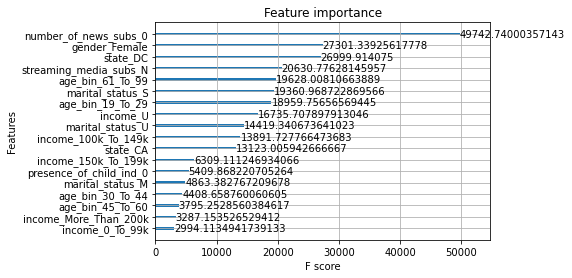

In [66]:
# Cover. The number of times a feature is used to split the data across all 
# trees weighted by the number of training data points that go through those 
# splits.
xgb.plot_importance(clf_xgb_optimized, importance_type="cover")

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

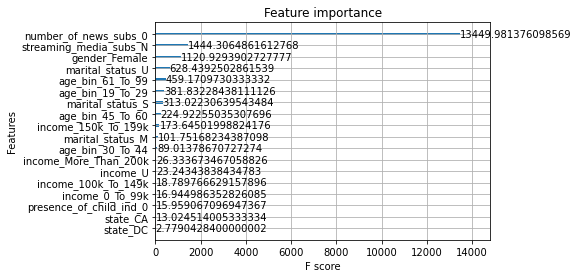

In [67]:
# Gain. The average training loss reduction gained when using a feature for 
# splitting.
xgb.plot_importance(clf_xgb_optimized, importance_type="gain")

In [68]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

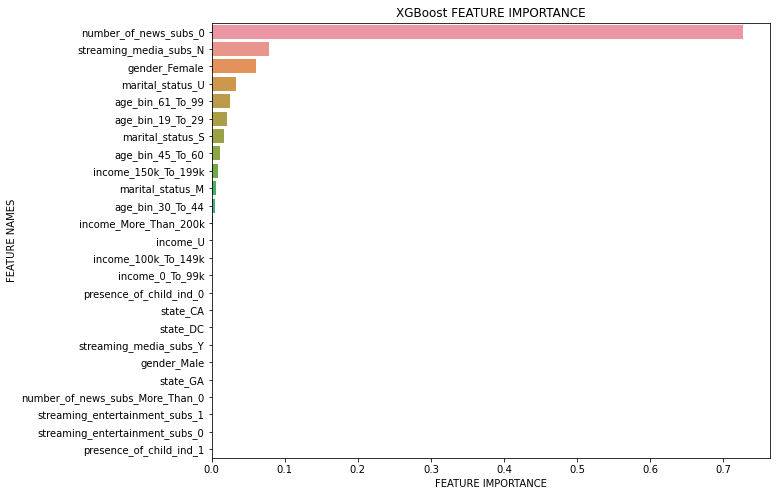

In [69]:
plot_feature_importance(clf_xgb_optimized.feature_importances_,X_encoded.columns,'XGBoost ')

<div class="alert alert-block alert-info">
It's clear that <b>number of news subs</b> is the most important, following by streaming media subs, gender and marital status.
</div>

In [70]:
# Calibrate Predict_proba with CalibratedClassifierCV

In [71]:
from sklearn.calibration import CalibratedClassifierCV
calibrated = CalibratedClassifierCV(clf_xgb_optimized, method='isotonic', cv='prefit')

In [72]:
### fit the calibrated model with test dataset
calibrated = calibrated.fit(X_test, y_test)

In [73]:
### calibrated probability
probability = (calibrated.predict_proba(X_encoded))

# Prediction

In [74]:
pred = pd.DataFrame(calibrated.predict_proba(X_encoded))[1]
pred_v1=pd.concat([person_id,pred],axis=1)
pred_v1.columns = ['anon_person_id', 'probability']

In [75]:
pred_v1

,anon_person_id,probability
0,1,0.405245
1,2,0.000000
2,3,0.945070
3,4,0.000351
4,5,0.000136
...,...,...
999495,999496,0.000290
999496,999497,0.000115
999497,999498,0.009226
999498,999499,0.034352


In [76]:
# Determine threshold for group to target

<AxesSubplot:ylabel='Density'>

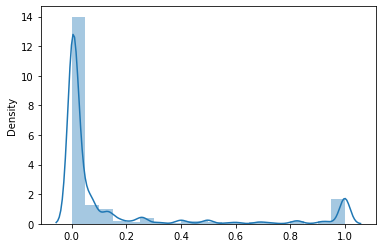

In [77]:
sns.distplot(calibrated.predict_proba(X_encoded)[:, [1]], 20)

In [78]:
pred_v1[pred_v1.probability>0.8].shape[0]/df.shape[0]

0.10340570285142571

<div class="alert alert-block alert-info">
0.8 is a high propensity score, and to target 10% of the population should be a reasonable size with respect to marketing budget investment. I will use 0.8 as my threshold.
</div>

In [79]:
pred_v1['prediction'] = 0
pred_v1.loc[pred_v1['probability']>0.8, 'prediction'] = 1

In [80]:
true_target = df[['anon_person_id','target']]
pred_fin = pd.merge(pred_v1, true_target, on = ["anon_person_id"], how="inner")

In [81]:
#pred_fin.to_csv('submission_fin.csv',index=False)

In [82]:
df_pred = pd.merge(pred_v1[['anon_person_id','prediction']], df, on = ["anon_person_id"], how="inner")
#df_pred.to_csv('df_with_pred.csv',index=False)

# Model Interpretation with Shap

In [98]:
# pip install shap
import shap
# take a random user predicted to be target
X_rand = df_pred[df_pred.prediction == 1].sample(1)
display(df.iloc[X_rand.index])

,anon_person_id,target,state,presence_of_child_ind,streaming_media_subs,streaming_entertainment_subs,marital_status,gender,income,number_of_news_subs,age_bin
999029,999030,1,CA,1,Y,1,S,Female,100k_To_149k,0,45_To_60


In [99]:
X_encoded.iloc[999029:999030]

,state_CA,state_DC,state_GA,presence_of_child_ind_0,presence_of_child_ind_1,streaming_media_subs_N,streaming_media_subs_Y,streaming_entertainment_subs_0,streaming_entertainment_subs_1,marital_status_M,marital_status_S,marital_status_U,gender_Female,gender_Male,income_0_To_99k,income_100k_To_149k,income_150k_To_199k,income_More_Than_200k,income_U,number_of_news_subs_0,number_of_news_subs_More_Than_0,age_bin_19_To_29,age_bin_30_To_44,age_bin_45_To_60,age_bin_61_To_99
999029,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0


In [100]:
#generate a prediction for the row
rand_pred = clf_xgb_optimized.predict(X_encoded[999029:999030])
rand_proba = calibrated.predict_proba(X_encoded[999029:999030])

In [101]:
explainer = shap.TreeExplainer(clf_xgb_optimized, model_output='probability', feature_dependence='independent', data=X_encoded)
shap_values = explainer.shap_values(X_encoded.iloc[X_rand.index])
shap.initjs()
display(shap.force_plot(explainer.expected_value, shap_values, X_encoded.iloc[X_rand.index]))

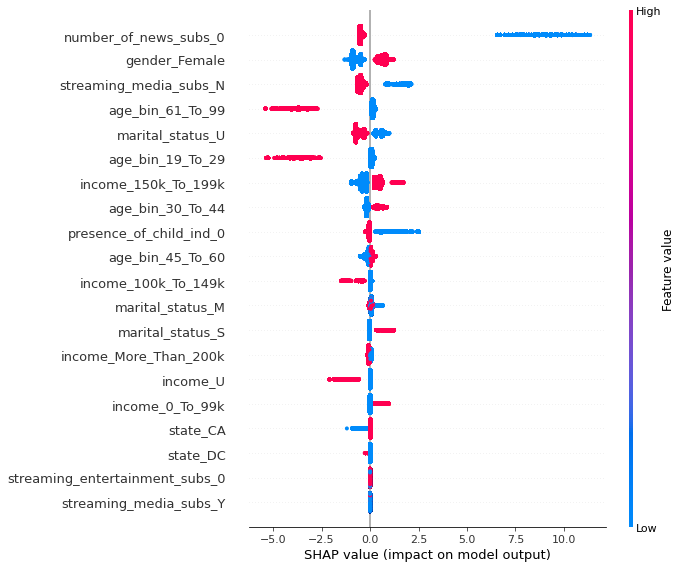

In [87]:
tr_shap_values = shap.TreeExplainer(clf_xgb_optimized).shap_values(X_train)
f = plt.figure()
shap.summary_plot(tr_shap_values, X_train)
#f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)

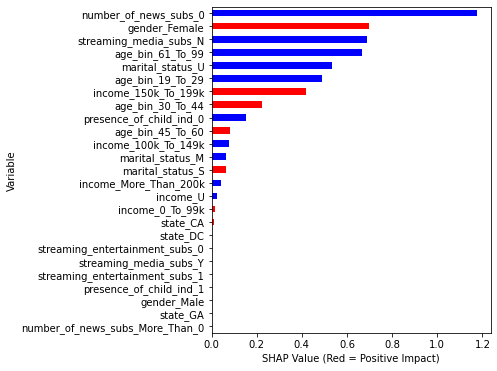

In [88]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(tr_shap_values,X_train) 